# 04 - Evaluación práctica del modelo

## 1. Introducción
- Objetivo: Clasificar una imagen de ayuda usando el modelo entrenado.

## 2. Carga del modelo y dependencias
- Importar librerías necesarias.
- Cargar el modelo entrenado y pesos.

In [6]:
import torch
from torchvision import models, transforms
import torch.nn as nn
from PIL import Image
import pandas as pd

# Cargar el diccionario de clases (usando el mismo que en entrenamiento)
df_val = pd.read_csv('../data/hagrid_val.csv')
label_to_idx = {label: idx for idx, label in enumerate(sorted(df_val['label'].unique()))}
idx_to_label = {v: k for k, v in label_to_idx.items()}
NUM_CLASSES = len(label_to_idx)

# Cargar el modelo entrenado
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.mobilenet_v3_small(weights=None)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, NUM_CLASSES)
model.load_state_dict(torch.load('../data/hagrid_models/best_model_weights.pth', map_location=device))
model = model.to(device)  # <-- Añade esta línea
model.eval()


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

## 3. Selección y visualización de la imagen de ayuda
- Cargar una imagen de ejemplo.
- Mostrar la imagen.

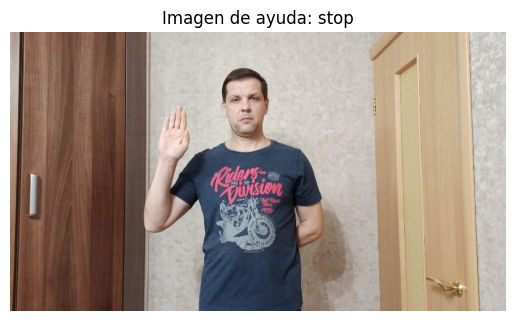

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de la imagen de ayuda (puedes cambiar entre stop y three_gun)
img_path = '../data/hagrid_test_images/stop/0a943b73-df44-438e-a347-c7ac97f6f223.jpg'
# img_path = '../data/hagrid_test_images/three_gun/00c04afe-fc1c-4a64-a807-b8be85068de0.jpg'

# Cargar y mostrar la imagen
image = Image.open(img_path).convert('RGB')
plt.imshow(image)
plt.axis('off')
plt.title(f"Imagen de ayuda: {img_path.split('/')[-2]}")
plt.show()


## 4. Preprocesamiento de la imagen
- Aplicar las transformaciones necesarias (resize, normalización, etc.).

In [8]:
from torchvision import transforms

# Definir las transformaciones (igual que en entrenamiento/evaluación)
IMG_SIZE = 224
eval_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Aplicar las transformaciones a la imagen cargada
input_tensor = eval_transform(image).unsqueeze(0).to(device)

## 5. Predicción
- Realizar la inferencia con el modelo.
- Mostrar la clase predicha.

In [9]:
with torch.no_grad():
    outputs = model(input_tensor)
    pred_idx = torch.argmax(outputs, dim=1).item()
    pred_label = idx_to_label[pred_idx]

print(f'Clase predicha: {pred_label}')


Clase predicha: stop


## 6. Conclusión
- Interpretación del resultado.
- Siguiente paso sugerido.